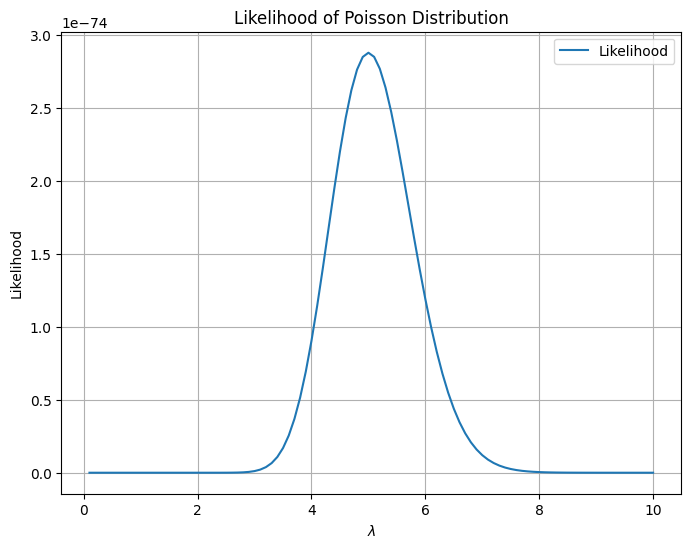

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial, gammaln #for factorial

def poisson_likelihood(data, lambd):
    n = np.size(data)
    sum_x = np.sum(data)
    log_factorials_sum = np.sum(np.log(factorial(data)))

    likelihood = np.exp(-lambd * n) * (lambd ** sum_x) * np.exp(-gammaln(sum_x + 1) - log_factorials_sum)
    return likelihood


# lambda values
lambd_values = np.linspace(0.1, 10, 100)

# example data
l = 5
n = 10
samples = np.random.poisson(lam=l, size=n)

# Compute likelihood values
likelihood_values = poisson_likelihood(samples, lambd_values)

# Plot likelihood
plt.figure(figsize=(8, 6))
plt.plot(lambd_values, likelihood_values, label='Likelihood')
plt.xlabel(r'$\lambda$')
plt.ylabel('Likelihood')
plt.title('Likelihood of Poisson Distribution')
plt.legend()
plt.grid(True)
plt.show()


Μας δινεται αυτο το σχεδιαγραμμα διοτι εχουμε το lamda το οποιο ειναι ο μεσος ρυθμος και επισης ο αριθμος των δειγματων σε ενα διαστημα ειναι ανεξαρτητα μεταξυ τους.

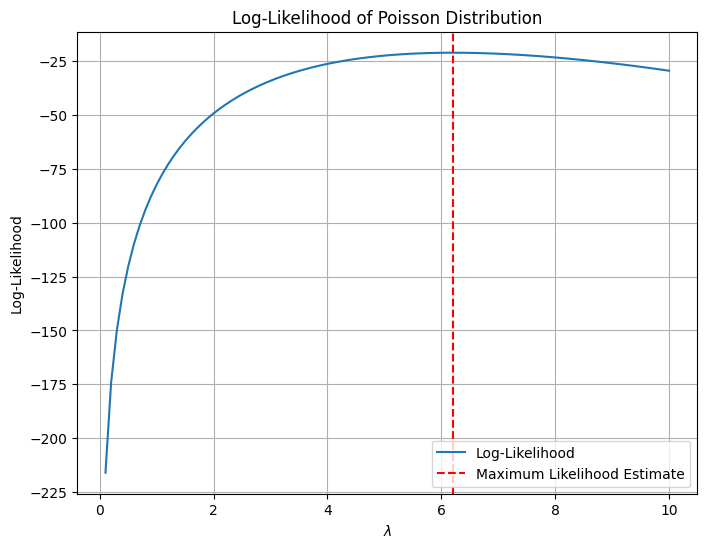

In [ ]:
def poisson_loglik(data, lambd):
    # Calcualte values
    n = np.size(data)
    sum_x = np.sum(data)
    sum_in_x_factorial = np.sum(np.log(factorial(data)))

    # Define log likelihood
    log_lik = -lambd * n + sum_x * np.log(lambd) - sum_in_x_factorial
    return log_lik

# lambda values
lambd_values = np.linspace(0.1, 10, 100)

# Compute log-likelihood values
log_likelihood_values = poisson_loglik(samples, lambd_values)

# Plot log-likelihood
plt.figure(figsize=(8, 6))
plt.plot(lambd_values, log_likelihood_values, label='Log-Likelihood')
plt.axvline(x=lambd_values[np.argmax(log_likelihood_values)], color='r', linestyle='--', label='Maximum Likelihood Estimate')
plt.xlabel(r'$\lambda$')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood of Poisson Distribution')
plt.legend()
plt.grid(True)
plt.show()


Ο λογαριθμος εδω μετατρεπει το γινομενο των πιθανοτητων σε αθροισμα ορων και  το αθροισμα ln(xi)! δεν εξαρταται απο το lamda.

In [ ]:
def poisson_loglik_derivative(data, lambd):
    n = np.size(data)
    sum_x = np.sum(data)
    return -n + sum_x / lambd

# Compute derivative of log-likelihood at MLE
derivative = poisson_loglik_derivative(samples, l)
print("Derivative of log-likelihood at MLE:", derivative)

Derivative of log-likelihood at MLE: -0.40000000000000036


In [ ]:
def estimate_poisson_lambda(data):
    lambda_mle = np.mean(data)
    return lambda_mle

# Estimate lambda using MLE
lambda_mle = estimate_poisson_lambda(samples)
print("lambda:", lambd_values)
print("Estimated lambda (MLE):", lambda_mle)

lambda: [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10. ]
Estimated lambda (MLE): 4.8


Question 1:

1) Η πιθανότητα το δεύτερο παιδί να έχει διαφορετικά γενέθλια από το πρώτο είναι 364/365

2)Εάν έχουμε 23 παιδιά, ο αριθμός των ζευγαριών που μπορούμε να σχηματίσουμε είναι: 23 * 22 / 2 = 253.

4)Με το θεωρημα του περιστερωνα , εάν υπάρχουν 366 παιδιά, τότε είναι βέβαιο πως τουλάχιστον δύο θα έχουν τα ίδια γενέθλια (υπάρχουν μόνο 365  ημέρες)

In [6]:
def probability_different_birthdays(m):
    probability = 1.0
    for k in range(1, m):
        probability *= (365 - k) / 365
    return probability

prob_birth = probability_different_birthdays(23)
print(prob_birth)

0.4927027656760144


Question 2:

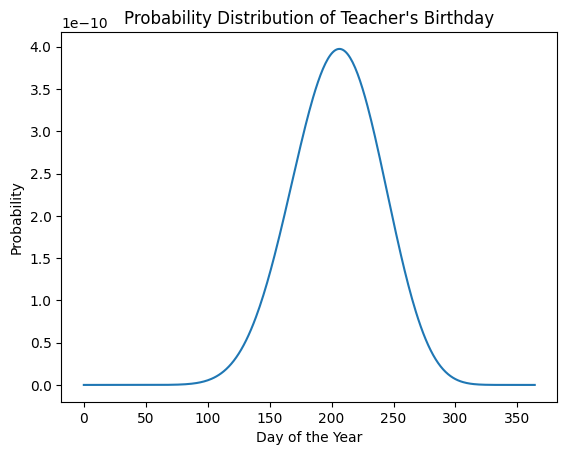

Most probable day of the year: 207


In [5]:
# Combination formula
def combinations(n, r):
    return factorial(n) / (factorial(r) * factorial(n - r))

def prob_some_left(num_left, num_guesses, teachers_birthday):
    p_left = (teachers_birthday - 1) / 365
    p_right = 1 - p_left
    return combinations(num_guesses, num_left) * p_left ** num_left * p_right ** (num_guesses - num_left) # dionimiki , n = num_guesses, k = num_left
                                                                                                          # p_left = p, p_right = 1-p

def update_probability(teachers_birthday, observation, prior_prob):
  if observation == 'L':
      return ((teachers_birthday - 1) / 365) * prior_prob
  elif observation == 'R':
      return (1 - ((teachers_birthday - 1) / 365)) * prior_prob
  else:
      return prior_prob

# estimate the teachers birthaday based on the given observations
def estimate_birthday(observations):
    prob_distribution = [1/365] * 365 # create a list with 1/365

    for observation in observations:
        for day in range(365):
            prob_distribution[day] = update_probability(day+1, observation, prob_distribution[day])

    return prob_distribution

observations = "LLLRLRRLRRRLLLRLLRRRLLL"
distribution = estimate_birthday(observations)

plt.plot(distribution)
plt.xlabel("Day of the Year")
plt.ylabel("Probability")
plt.title("Probability Distribution of Teacher's Birthday")
plt.show()

most_probable_day = np.argmax(distribution) + 1  # starts from 0
print("Most probable day of the year:", most_probable_day)